In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.8.0'

In [3]:
print("Num GPUs available: " ,len(tf.config.list_physical_devices('GPU')))

Num GPUs available:  0


In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

# Preparing data, Data Agumentation by rescaling and reseizing, 255 total pixel size

In [42]:
#Rescaling 
batch_size = 16
training_datagenerator = ImageDataGenerator(rescale=1.0/255,horizontal_flip=True, 
                                             vertical_flip=True, 
                                             zoom_range=0.2, shear_range=0.2,
                                            width_shift_range=0.2, height_shift_range=0.2,
                                           validation_split=0.2)


In [65]:
#Data is being divided into training and validation.
#Reseizing
training = training_datagenerator.flow_from_directory(r"C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training Data", 
                                                       target_size = (256,256), color_mode = 'rgb', 
                                                       class_mode = 'binary', batch_size = 16,
                                                       subset = 'training')
validation=training_datagenerator.flow_from_directory(r"C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training Data",
                                                target_size=(256, 256),color_mode='rgb',
                                       class_mode='binary', batch_size=16,subset='validation')

Found 11053 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


# CNN architecture


In [66]:
#Cnn Architechture or Initializing cnn Architechture
cnn=tf.keras.models.Sequential()

#Adding 1st layer / Input Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', input_shape=[256,256,3]))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding 2nd layer 
cnn.add(tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding 3rd layer 
cnn.add(tf.keras.layers.Conv2D(filters=256, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#falttened layer
cnn.add(tf.keras.layers.Flatten())

#fully connected Layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [67]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 256)     

In [174]:
#after every model to check 
ckeckpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training models\model.h5', monitor='val_loss',
                                              mode="min", save_best_only=True)
callbacks = ckeckpoint

In [175]:
#Training the CNN Model i.e. Compile and Train
cnn.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit_generator(training, validation_data=validation, epochs=1, 
                  steps_per_epoch=training.samples//16,
                  validation_steps=validation.samples//16,
                  callbacks = callbacks)

C:\Users\chand\AppData\Local\Temp\ipykernel_10316\2561266641.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(training, validation_data=validation, epochs=1,


690/690 [==============================] - 1160s 2s/step - loss: 0.0505 - accuracy: 0.9865 - val_loss: 0.0307 - val_accuracy: 0.9916


In [108]:
#qcnn=load_model(r'C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\Training models\model.h5')

cnn.summary()

In [190]:
image_for_testing=r'C:\Users\chand\OneDrive\Desktop\Project_Phase\FireDataset\1.jpg'

In [191]:
image_for_testing

'C:\\Users\\chand\\OneDrive\\Desktop\\Project_Phase\\FireDataset\\1.jpg'

In [192]:
test_image=image.load_img(image_for_testing,target_size=(256,256))

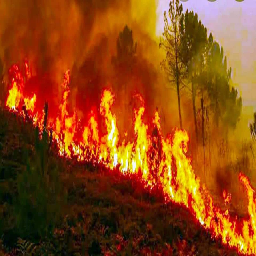

In [193]:
test_image

In [194]:
test_image = image.img_to_array(test_image)

In [195]:
test_image

array([[[166.,  75.,   2.],
        [166.,  80.,   5.],
        [163.,  81.,   5.],
        ...,
        [210., 185., 242.],
        [210., 185., 242.],
        [212., 187., 244.]],

       [[166.,  75.,   2.],
        [166.,  80.,   5.],
        [163.,  81.,   5.],
        ...,
        [207., 182., 239.],
        [207., 182., 239.],
        [206., 181., 238.]],

       [[163.,  72.,   0.],
        [167.,  81.,   6.],
        [164.,  82.,   6.],
        ...,
        [207., 182., 239.],
        [207., 182., 239.],
        [204., 179., 236.]],

       ...,

       [[ 63.,  32.,   1.],
        [ 64.,  33.,   2.],
        [ 63.,  34.,   4.],
        ...,
        [223., 112.,  43.],
        [253., 127.,  68.],
        [229., 140.,  14.]],

       [[ 62.,  32.,   0.],
        [ 64.,  34.,   0.],
        [ 69.,  40.,   6.],
        ...,
        [156.,  19.,   0.],
        [212.,  64.,  34.],
        [238., 124.,  36.]],

       [[ 59.,  27.,   2.],
        [ 59.,  28.,   0.],
        [ 73.,  

In [196]:
test_image=test_image/255

In [197]:
test_image

array([[[0.6509804 , 0.29411766, 0.00784314],
        [0.6509804 , 0.3137255 , 0.01960784],
        [0.6392157 , 0.31764707, 0.01960784],
        ...,
        [0.8235294 , 0.7254902 , 0.9490196 ],
        [0.8235294 , 0.7254902 , 0.9490196 ],
        [0.83137256, 0.73333335, 0.95686275]],

       [[0.6509804 , 0.29411766, 0.00784314],
        [0.6509804 , 0.3137255 , 0.01960784],
        [0.6392157 , 0.31764707, 0.01960784],
        ...,
        [0.8117647 , 0.7137255 , 0.9372549 ],
        [0.8117647 , 0.7137255 , 0.9372549 ],
        [0.80784315, 0.70980394, 0.93333334]],

       [[0.6392157 , 0.28235295, 0.        ],
        [0.654902  , 0.31764707, 0.02352941],
        [0.6431373 , 0.32156864, 0.02352941],
        ...,
        [0.8117647 , 0.7137255 , 0.9372549 ],
        [0.8117647 , 0.7137255 , 0.9372549 ],
        [0.8       , 0.7019608 , 0.9254902 ]],

       ...,

       [[0.24705882, 0.1254902 , 0.00392157],
        [0.2509804 , 0.12941177, 0.00784314],
        [0.24705882, 0

In [198]:
test_image=np.expand_dims(test_image,axis=0)

In [199]:
test_image

array([[[[0.6509804 , 0.29411766, 0.00784314],
         [0.6509804 , 0.3137255 , 0.01960784],
         [0.6392157 , 0.31764707, 0.01960784],
         ...,
         [0.8235294 , 0.7254902 , 0.9490196 ],
         [0.8235294 , 0.7254902 , 0.9490196 ],
         [0.83137256, 0.73333335, 0.95686275]],

        [[0.6509804 , 0.29411766, 0.00784314],
         [0.6509804 , 0.3137255 , 0.01960784],
         [0.6392157 , 0.31764707, 0.01960784],
         ...,
         [0.8117647 , 0.7137255 , 0.9372549 ],
         [0.8117647 , 0.7137255 , 0.9372549 ],
         [0.80784315, 0.70980394, 0.93333334]],

        [[0.6392157 , 0.28235295, 0.        ],
         [0.654902  , 0.31764707, 0.02352941],
         [0.6431373 , 0.32156864, 0.02352941],
         ...,
         [0.8117647 , 0.7137255 , 0.9372549 ],
         [0.8117647 , 0.7137255 , 0.9372549 ],
         [0.8       , 0.7019608 , 0.9254902 ]],

        ...,

        [[0.24705882, 0.1254902 , 0.00392157],
         [0.2509804 , 0.12941177, 0.00784314]

In [200]:
predict=cnn.predict(np.round(test_image))
result=np.argmax(predict,axis=1)

In [201]:
if result[0]==0:
    print("Fire")
else:
    print("smoke")

Fire
